In [20]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import numpy as np
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) #Adjusting the configuration of the plots being created


In [21]:
# Reading the Data
df = pd.read_csv('D:\movies.csv', engine='python')

In [23]:
# Checking if there is any missing data in the dataframe
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}'.format(col, pct_missing))

budget - 0.0
company - 0.0
country - 0.0
director - 0.0
genre - 0.0
gross - 0.0
name - 0.0
rating - 0.0
released - 0.0
runtime - 0.0
score - 0.0
star - 0.0
votes - 0.0
writer - 0.0
year - 0.0


In [24]:
# Looking for Datatypes
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [25]:
#Changing Datatypes for columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [26]:
#From the Released date we'll now take the years and make a new column
df['yearcorrect'] =df['released'].astype(str).str[:4]


In [27]:
# Sorting According to the gross column
pd.set_option('display.max_rows', 20) # Use None in place of 20 to see all rows by using inplace=False
df.sort_values(by=['gross'], inplace=True, ascending=False)

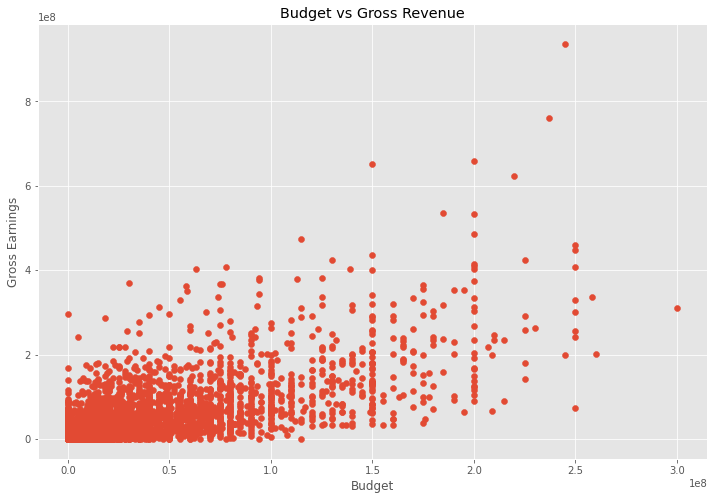

In [10]:
# Correlation
# Scatter Plot budget vs gross revenue
plt.scatter(x=df['budget'], y=df['gross'])
plt.title("Budget vs Gross Revenue")
plt.xlabel("Budget")
plt.ylabel("Gross Earnings")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

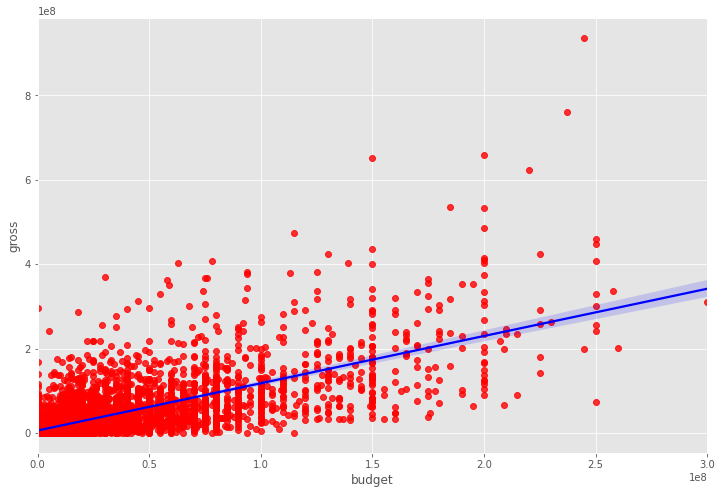

In [12]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [13]:
# Looking at the correlation
df.corr() # methods = 'pearson' -- default; 'kendall', 'spearman'

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


There is a high correlation between budget and gross

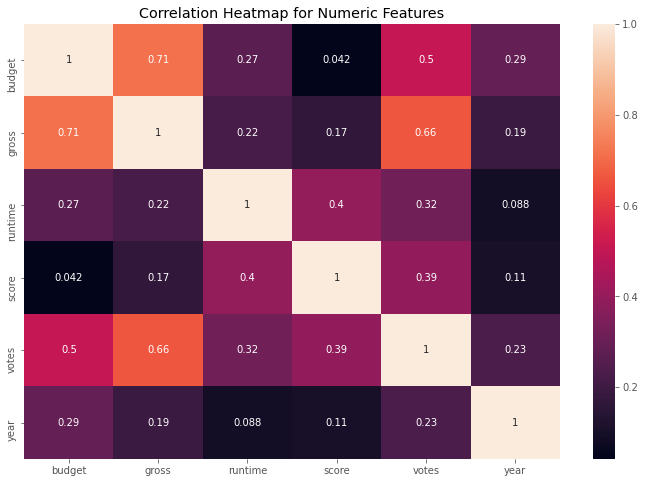

In [15]:
correaltion_matrix = df.corr()
sns.heatmap(correaltion_matrix, annot=True)
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

Changing the columns that have a object dtype to category so that their correlation with gross revenue can be obtained

In [16]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] =  df_numerized[col_name].cat.codes

df_numerized.head()


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,29
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,23
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,11
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,29
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,26


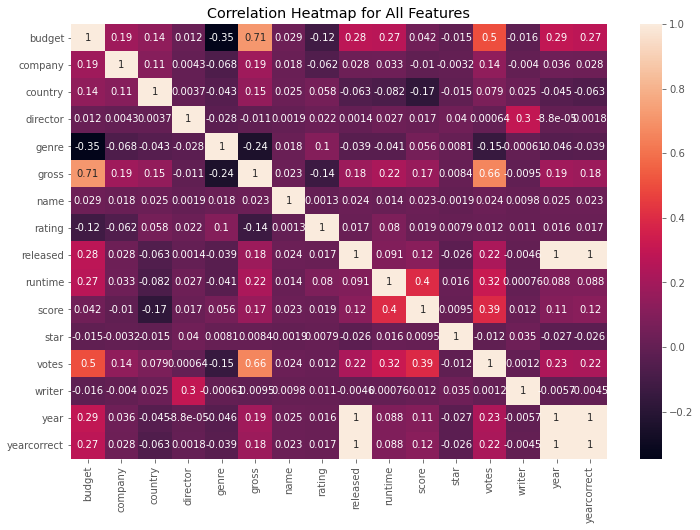

In [30]:
correaltion_matrix = df_numerized.corr()
sns.heatmap(correaltion_matrix, annot=True)
plt.title('Correlation Heatmap for All Features')
plt.show()